## Machine Learning (Linear Regression) Project

This project aims to build a **linear regression** model that predicts the condominium prices in Malaysia, based on this [dataset](https://www.kaggle.com/datasets/mcpenguin/raw-malaysian-housing-prices-data).

I have also written a [Medium article]() on this very project.

2 major parts:
1. Data Cleaning
2. Machine Learning 

Prepared by: **Faiz Yah** ^^

Tongji University, Shanghai. _20th May 2024_


# 1. Data Cleaning

### 1.1 Check information of the data set

In [1]:
import pandas as pd

df = pd.read_csv('houses.csv')

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   description             4000 non-null   object
 1   Bedroom                 4000 non-null   object
 2   Bathroom                4000 non-null   object
 3   Property Size           4000 non-null   object
 4   Nearby School           687 non-null    object
 5   Nearby Mall             365 non-null    object
 6   Ad List                 4000 non-null   int64 
 7   Category                4000 non-null   object
 8   Facilities              4000 non-null   object
 9   Building Name           4000 non-null   object
 10  Developer               4000 non-null   object
 11  Tenure Type             4000 non-null   object
 12  Address                 4000 non-null   object
 13  Completion Year         4000 non-null   object
 14  # of Floors             4000 non-null   object
 15  Tota

In [3]:
df.shape

(4000, 32)

In [4]:
pd.set_option('display.max_columns', None)
df.head()

,description,Bedroom,Bathroom,Property Size,Nearby School,Nearby Mall,Ad List,Category,Facilities,Building Name,Developer,Tenure Type,Address,Completion Year,# of Floors,Total Units,Property Type,Parking Lot,Floor Range,Land Title,Firm Type,Firm Number,REN Number,Bus Stop,Mall,Park,School,Hospital,price,Highway,Nearby Railway Station,Railway Station
0,Iconic Building @ KL SETAPAK\nNew launching & ...,4,2,1000 sq.ft.,Sekolah Menengah Pendidikan Khas Cacat Penglih...,Setapak Central,98187451,"Apartment / Condominium, For sale",-,Kenwingston Platz,Kenwingston Group,Freehold,"Jalan Gombak, Setapak, Kuala Lumpur",-,-,-,Service Residence,2,-,Non Bumi Lot,VE,30338,-,Bus Stop Starparc Point\nBus Stop Setapak Cent...,Setapak Central,"Park at Taman Tasik Danau Kota, Setapak, Kuala...",Sekolah Menengah Pendidikan Khas Cacat Penglih...,Columbia Asia Hospital,RM 340 000,NaN,NaN,NaN
1,"FOR SALE @ RM250,000\nIntroduction:\n~ Pangsap...",3,2,980 sq.ft.,NaN,NaN,101683090,"Apartment / Condominium, For sale","Parking, Security, Swimming Pool, Playground, ...",Kenanga (Park View Court),-,Freehold,"Jalan Kenanga 3/8, Melaka City, Melaka",-,-,-,Apartment,1,Low,Non Bumi Lot,E,30812,REN 15862,NaN,NaN,NaN,NaN,NaN,RM 250 000,NaN,NaN,NaN
2,"[Below Market] Sri Lavender Apartment,Tmn Sepa...",3,2,1000 sq.ft.,NaN,NaN,103792905,"Apartment / Condominium, For sale","Playground, Minimart, Jogging Track, Barbeque ...",Sri Lavender Apartment,TLS Group,Freehold,"Jalan Sepakat Indah 2/1, Taman Sepakat Indah 2...",2007,13,445,Apartment,1,Medium,Non Bumi Lot,-,-,-,NaN,NaN,NaN,NaN,NaN,RM 230 000,SILK Sg Ramal (T) Toll Plaza,NaN,NaN
3,Flat Pandan Indah\nJalan Pandan Indah 3/3\nNon...,3,1,592 sq.ft.,NaN,NaN,103806240,"Apartment / Condominium, For sale","Parking, Playground, Minimart, Jogging Track",Flat Pandan Indah,-,Leasehold,"jalan pandan indah 3/3, Selangor, Ampang",-,-,-,Flat,1,-,Non Bumi Lot,E,11584,REN 16279,NaN,NaN,NaN,NaN,NaN,RM 158 000,NaN,NaN,NaN
4,"* Open-concept Soho with balcony, unblock view...",1,1,467 sq.ft.,Sekolah Jenis Kebangsaan (T) Ladang Midlands,i-Soho i-City,103806234,"Apartment / Condominium, For sale","Minimart, Gymnasium, Parking, Security",i-Soho @ i-City,i-Berhad,Freehold,"Jalan Plumbum 7/102, Shah Alam, Selangor",-,43,956,Studio,-,Low,Bumi Lot,E,31916,-,Bus Stop at Persiaran Permai 1\nBus Stop at Pe...,i-Soho i-City\nGulati\nCentral i-City Shopping...,"Park 2 at Section 7, Shah Alam\nPark 1 at Sect...",Sekolah Jenis Kebangsaan (T) Ladang Midlands\n...,Osel Clinic (Shah Alam)\nHospital Shah Alam,RM 305 000,NaN,NaN,NaN


### 1.2 Drop unwanted columns

In [5]:
columns_drop = ['description','Nearby School','Nearby Mall','Ad List',
                'Category','Developer','Address','Completion Year',
                'Floor Range','Firm Type','Firm Number','REN Number',
                'Bus Stop','Mall','Park','School','Hospital','Highway',
                'Railway Station','Nearby Railway Station', '# of Floors', 
                'Total Units']

df = df.drop(columns=columns_drop)

### 1.3 Check for any NA rows and remove if necessary

In [6]:
df.isna().sum()

Bedroom          0
Bathroom         0
Property Size    0
Facilities       0
Building Name    0
Tenure Type      0
Property Type    0
Parking Lot      0
Land Title       0
price            0
dtype: int64

### 1.4 Extract only numerical values from "Property Size" column

In [7]:
df['Property Size_in_sq_ft'] = df['Property Size'].str[:-6].astype(int)

df = df.drop(columns='Property Size')

### 1.5 Modify the "Facilities" column to display amount of facilities 

In [8]:
df['Amount of Facilities'] = df['Facilities'].apply(lambda x: 0 if x.strip() == '-' else len(x.split(',')))
df = df.drop(columns='Facilities')

### 1.6 Extract only numerical values from "price" column

In [9]:
df['Price_in_RM'] = df['price'].str[2:].replace(' ', '', regex=True).astype(int)
df = df.drop(columns='price')

### 1.7 Replace '-' value with 0 in "Parking Lot" column

In [10]:
df['Parking Lot'] = df['Parking Lot'].replace('-','0', regex=True).astype(int)

### 1.8 Remove the row where column "Bedroom" and "Bathroom" is '-'

In [11]:
df = df[~df['Bathroom'].str.contains('-', na=False)]
df = df[~df['Bedroom'].str.contains('-', na=False)]

### 1.9 Convert "Bedroom" and "Bathroom" columns into '.int' type

In [12]:
df[['Bedroom','Bathroom']].astype(int)

,Bedroom,Bathroom
0,4,2
1,3,2
2,3,2
3,3,1
4,1,1
...,...,...
3995,3,2
3996,3,2
3997,3,2
3998,4,3


### 1.10 Rearrange the columns

In [13]:
rearrange_columns = ['Building Name','Property Type',
                     'Property Size_in_sq_ft','Bedroom',
                     'Bathroom','Amount of Facilities',
                     'Parking Lot','Land Title','Tenure Type',
                     'Price_in_RM']

df = df[rearrange_columns]

### 1.11 Export to .csv

In [14]:
df.to_csv('house_data_cleaned.csv')

# 2. Machine Learning

### 2.1 Import .csv, remove unwanted column and check information of the data

In [15]:
import pandas as pd

df = pd.read_csv('house_data_cleaned.csv')

df = df.drop(columns=['Unnamed: 0','Building Name'])

df.head()

,Property Type,Property Size_in_sq_ft,Bedroom,Bathroom,Amount of Facilities,Parking Lot,Land Title,Tenure Type,Price_in_RM
0,Service Residence,1000,4,2,0,2,Non Bumi Lot,Freehold,340000
1,Apartment,980,3,2,6,1,Non Bumi Lot,Freehold,250000
2,Apartment,1000,3,2,7,1,Non Bumi Lot,Freehold,230000
3,Flat,592,3,1,4,1,Non Bumi Lot,Leasehold,158000
4,Studio,467,1,1,4,0,Bumi Lot,Freehold,305000


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Property Type           3999 non-null   object
 1   Property Size_in_sq_ft  3999 non-null   int64 
 2   Bedroom                 3999 non-null   int64 
 3   Bathroom                3999 non-null   int64 
 4   Amount of Facilities    3999 non-null   int64 
 5   Parking Lot             3999 non-null   int64 
 6   Land Title              3999 non-null   object
 7   Tenure Type             3999 non-null   object
 8   Price_in_RM             3999 non-null   int64 
dtypes: int64(6), object(3)
memory usage: 281.3+ KB


In [17]:
df.shape

(3999, 9)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Property Type           3999 non-null   object
 1   Property Size_in_sq_ft  3999 non-null   int64 
 2   Bedroom                 3999 non-null   int64 
 3   Bathroom                3999 non-null   int64 
 4   Amount of Facilities    3999 non-null   int64 
 5   Parking Lot             3999 non-null   int64 
 6   Land Title              3999 non-null   object
 7   Tenure Type             3999 non-null   object
 8   Price_in_RM             3999 non-null   int64 
dtypes: int64(6), object(3)
memory usage: 281.3+ KB


### 2.2 Define features (X) and target (y)

In [19]:
X = df.drop(columns = 'Price_in_RM')
y = df['Price_in_RM']

X represents the features (independent variables)  that are used for the predictions. 


y represents the target (dependent variable) that the ML model aims to predict, in this case is the Price of the Houses in RM (currency of Malaysia).

### 2.3 Split the data into testing sets and training sets

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

We then split the data set into the ratio of 80/20.
80% of the data are used for training the model, while the remaining 20% are reserved for testing the performance of the model.

### 2.4 Preprocessing of categorical and numerical columns

In [21]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler


categorical_columns = ['Property Type', 'Land Title', 'Tenure Type']
numerical_columns = ['Property Size_in_sq_ft', 'Bedroom', 'Bathroom', 
                     'Amount of Facilities', 'Parking Lot']

categorical_transformer = OneHotEncoder()
numerical_transformer = StandardScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_columns),
        ('num',numerical_transformer, numerical_columns)
    ]
)

This preprocessing process aims to transform the data into formats that are most suitable for analysis by the ML model. 


For the categorical columns, we pass through 'OneHotEncoder' to convert categorical values into numerical format.


For numerical columns, we apply StandardScaler to standardize the numerical values into a standard format.


Next, the ColumnTransformer combines these two transformers into a single preprocessor.

### 2.5 Selection of Machine Learning model

In [22]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

As a beginner, linear regression is the perfect choice of ML model for many reasons: simplicity, interpretability, and efficiency. Although relatively simple, it is still equally significant.

### 2.6  Create pipeline

In [23]:
from sklearn.pipeline import Pipeline

my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                             ('model', model)])

Pipeline merges the preprocessing and ML modelling into one, meaning that we can simplify the whole process into a single step. 

(Without pipeline, we would have to carry out OneHotEncoder, StandardScalar and model training into individual steps, which would be complicated.)

### 2.7 Fit the model with the training sets

In [24]:
my_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat', OneHotEncoder(),
                                                  ['Property Type',
                                                   'Land Title',
                                                   'Tenure Type']),
                                                 ('num', StandardScaler(),
                                                  ['Property Size_in_sq_ft',
                                                   'Bedroom', 'Bathroom',
                                                   'Amount of Facilities',
                                                   'Parking Lot'])])),
                ('model', LinearRegression())])

As this is a supervised learning ML model, we would then fit the model with the features (X) and target (y) of the training sets.

### 2.8 Identify the differences in prices (Predicted vs Actual)

In [25]:
predicted_value = my_pipeline.predict(X_test)
actual_value = y_test

In [26]:
price_comparison = pd.DataFrame({'Predicted Price':predicted_value, 
                           'Actual Price':actual_value})
price_comparison

,Predicted Price,Actual Price
1244,502332.0,349000
410,828560.0,1009000
1624,294456.0,330000
289,325928.0,360000
1527,493988.0,338000
...,...,...
402,564044.0,570000
2526,576932.0,598000
3765,329652.0,235000
3255,577420.0,379000


The training session is over, now it is time for testing. 


Giving the model the Features(X_test) of training sets, it would then predict the price of the houses based on what it had learned during the training session.


We can now compare the Predicted Price with the Actual Price (y_test). Some predictions were off by tens of thousands, while others few hundreds of thousands.

### 2.9 Evaluate the model

In [27]:
from sklearn.metrics import mean_absolute_error, r2_score

mae = mean_absolute_error(actual_value, predicted_value)
r2 = r2_score(actual_value, predicted_value)


print('Mean Absolute Error: ', round(mae, 2))
print('R2 Score: ', round(r2,5))

Mean Absolute Error:  126926.09
R2 Score:  0.50338


It would be challenging to gauge the performance of a model solely by looking at the difference in prices, that is where statistical evaluation metrics comes in!


Mean Absolute Error (MAE) is incredibly intuitive and easy to understand, it signifies the average differences between the predicted price and actual price. In this case, it means that our predictions were off by RM126,926.09 on average. 


R² Score provides an overall assessment of how well the model approximates the actual data. The R²score of 0.50338 signifies that the model explains only about 50.34% of the variance in the actual prices.

### 2.10 Draw scatter plot

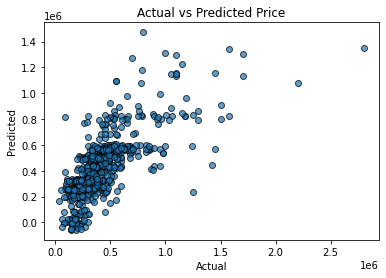

In [28]:
import matplotlib.pyplot as plt

plt.scatter(actual_value, predicted_value, alpha=0.7, edgecolors='k')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Price')
plt.show()

Thank you for reading ! :)